<a href="https://colab.research.google.com/github/Allanx495/Projects/blob/main/ACM_DAS_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Datasets/max_planck_weather_ts.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
#GOALS:
# Cleaning the dataset
# Extract target variables
# Isolate the years
# Rename any columns
# Resolving null values
# Normalization

In [ ]:
df.isna().any()

,0
Date Time,False
p (mbar),False
T (degC),False
Tpot (K),False
Tdew (degC),False
rh (%),False
VPmax (mbar),False
VPact (mbar),False
VPdef (mbar),False
sh (g/kg),False


In [ ]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB
None


In [ ]:
print(df.duplicated())
df.drop_duplicates(inplace = True)
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
420546    False
420547    False
420548    False
420549    False
420550    False
Length: 420551, dtype: bool
0         False
1         False
2         False
3         False
4         False
          ...  
420546    False
420547    False
420548    False
420549    False
420550    False
Length: 420224, dtype: bool


In [ ]:
# setting the target variable

target = df[['T (degC)']]
target.head()

,T (degC)
0,-8.02
1,-8.41
2,-8.51
3,-8.31
4,-8.27


In [ ]:
# Extracting the target variables: Temperature and Humidity
target_variables = df[['T (degC)', 'rh (%)']]
target_variables.head()

,T (degC),rh (%)
0,-8.02,93.3
1,-8.41,93.4
2,-8.51,93.9
3,-8.31,94.2
4,-8.27,94.1


In [ ]:
# Clean column names for better readability
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
    .str.replace('%', 'percent', regex=False)
)

# Convert 'date_time' to datetime format
df['date_time'] = pd.to_datetime(df['date_time'], format='%d.%m.%Y %H:%M:%S')

# Droping null values to double check
df = df.dropna()

# Store datetime separately
date_col = df['date_time']
numeric_df = df.drop(columns=['date_time'])

# Normalize numeric features
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_df)
normalized_df = pd.DataFrame(normalized_data, columns=numeric_df.columns)

# Add datetime back
normalized_df['date_time'] = date_col

# Set datetime as index (useful for time series)
normalized_df.set_index('date_time', inplace=True)

# Extract target variables: temperature and humidity
target_variables = normalized_df[['t_degc', 'rh_percent']]
target_variables.head(20)

,t_degc,rh_percent
date_time,,
2009-01-01 00:10:00,0.248632,0.923033
2009-01-01 00:20:00,0.242163,0.924182
2009-01-01 00:30:00,0.240504,0.929925
2009-01-01 00:40:00,0.243822,0.933372
2009-01-01 00:50:00,0.244485,0.932223
2009-01-01 01:00:00,0.248134,0.935669
2009-01-01 01:10:00,0.255266,0.940264
2009-01-01 01:20:00,0.255266,0.935669
2009-01-01 01:30:00,0.250456,0.928777


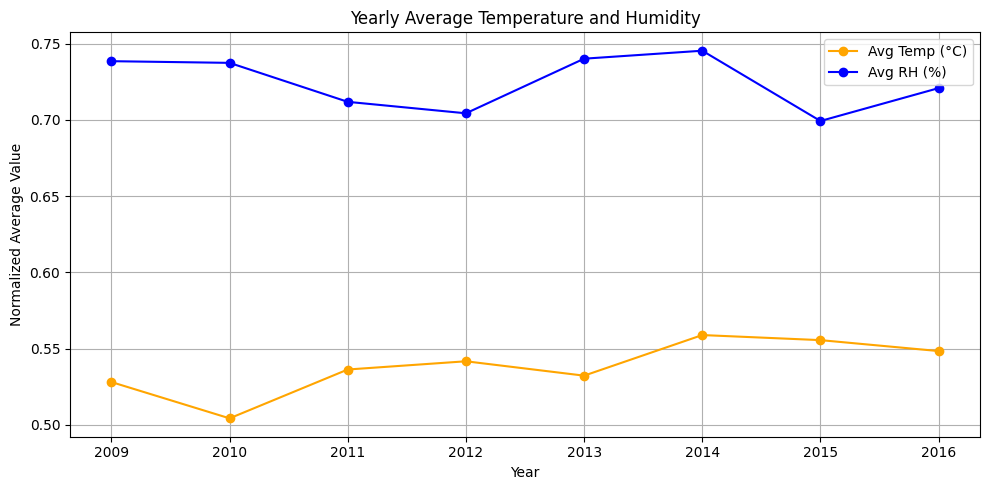

In [ ]:
# Reset index to access 'date_time' again
yearly_df = normalized_df.reset_index()
yearly_df['year'] = yearly_df['date_time'].dt.year

# Grouped by Year and calculated the Mean
yearly_avg = yearly_df.groupby('year')[['t_degc', 'rh_percent']].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg['t_degc'], marker='o', label='Avg Temp (°C)', color='orange')
plt.plot(yearly_avg.index, yearly_avg['rh_percent'], marker='o', label='Avg RH (%)', color='blue')

plt.title('Yearly Average Temperature and Humidity')
plt.xlabel('Year')
plt.ylabel('Normalized Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

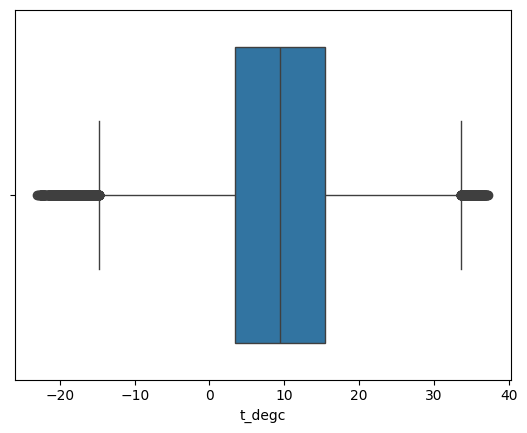

In [ ]:
#do a box plot of the distribution of temp for celc
sns.boxplot(x=df['t_degc'])
plt.show()

In [ ]:
# Most temperatures fall between ~0.4 and ~0.7 (normalized scale).
# There are some cold outliers below 0.2 and hot outliers above 0.9.
# The data is fairly symmetric, with a centered median around 0.6.
# This means temperatures are mostly stable, with rare extreme values.
# Outliers could be unusual weather events or sensor errors worth checking.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Use the new column names after cleaning: 't_degc' and 'rh_percent'
df[['t_degc', 'rh_percent']] = scaler.fit_transform(df[['t_degc', 'rh_percent']])

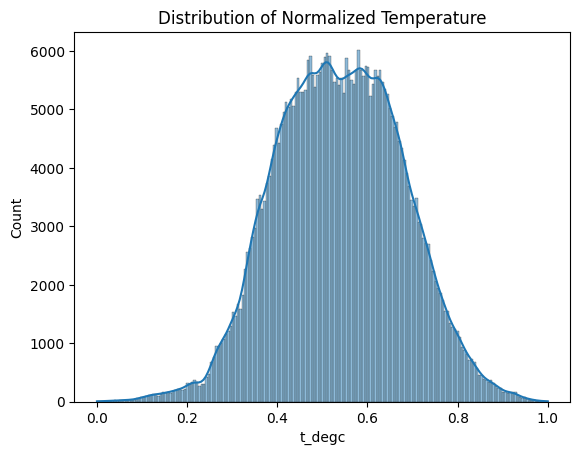

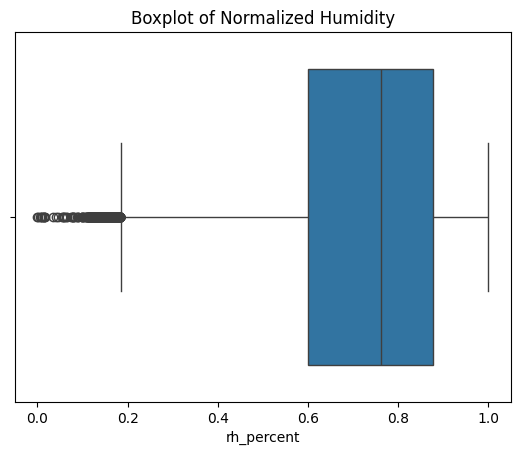

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for temperature (goal: better viz compared to box plot)
sns.histplot(df['t_degc'], kde=True)
plt.title("Distribution of Normalized Temperature")
plt.show()

# Boxplot for relative humidity
sns.boxplot(x=df['rh_percent'])
plt.title("Boxplot of Normalized Humidity")
plt.show()

In [ ]:
# Histogram Results:
# Most temperatures fall between ~0.4 and ~0.7 (normalized).
# The shape is symmetric and bell-shaped, peaking near 0.55–0.6.
# Very few temperature values exist below 0.2 or above 0.9.
# This shows temperature data is stable with few extremes.
# Matches the skewness value (~0), indicating no major skew.

In [ ]:
# Second Box plot results:
# Most humidity values fall between ~0.6 and ~0.9 (normalized).
# The median is around 0.75, showing high humidity is common.
# There are many outliers below 0.2, indicating rare low-humidity events.
# The data is slightly left-skewed, with more extreme low values.
# Overall, humidity tends to stay high, with few dry conditions.


In [ ]:
print("Skewness of Temp:", df['t_degc'].skew())
print("Skewness of Humidity:", df['rh_percent'].skew())


Skewness of Temp: -0.018692303418449192
Skewness of Humidity: -0.6725385280052653


In [ ]:
# Skewness of Temp: -0.0186 → nearly symmetric
# Skewness of Humidity: -0.6725 → moderate left skew
# The temperature distribution is well balanced
# Humidity has more extreme low values than high ones
# Both metrics align well with their visualizations

In [ ]:
# Using iterrows()
for index, row in df.iterrows():
    print(f"Row {index}: Temp = {row['t_degc']}, Humidity = {row['rh_percent']}")
    break

# Using itertuples() bc it couldbe faster
for row in df.itertuples(index=True):
    print(f"Temp = {row.t_degc}, Humidity = {row.rh_percent}")
    break

Row 0: Temp = 0.2486316138663128, Humidity = 0.92303273980471
Temp = 0.2486316138663128, Humidity = 0.92303273980471


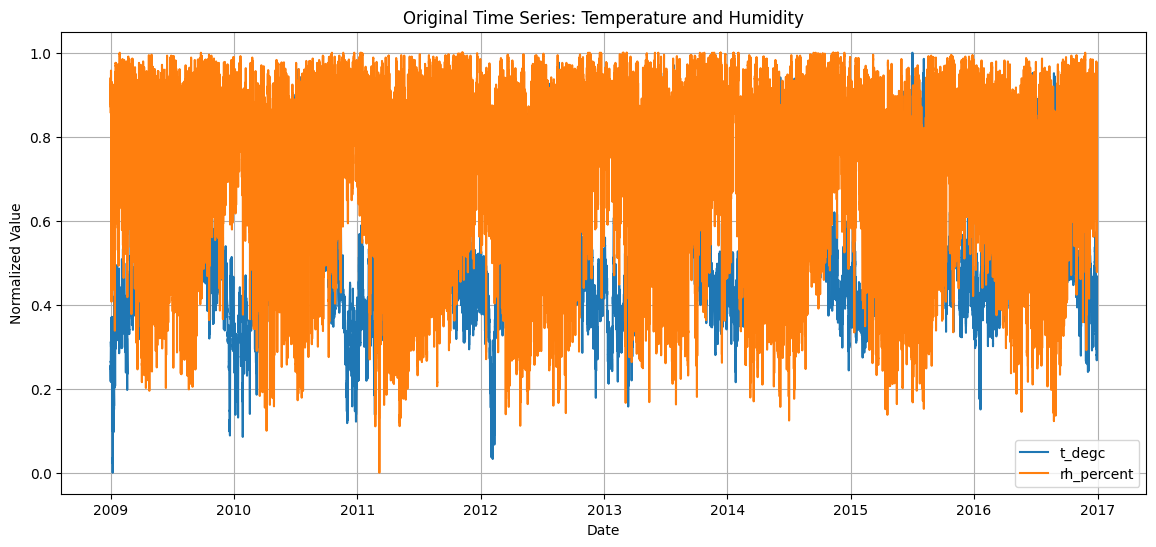

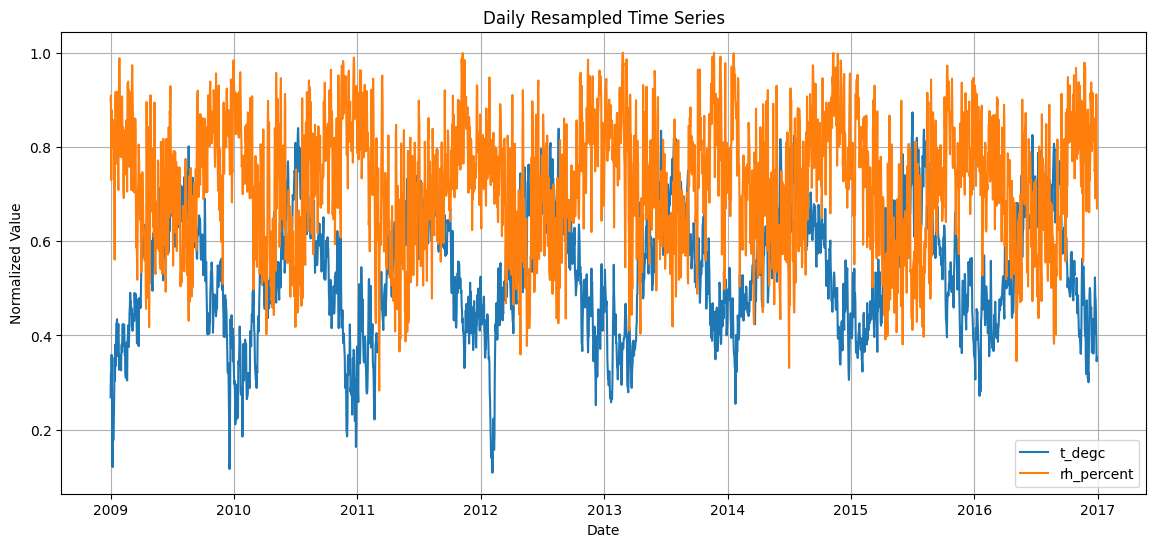

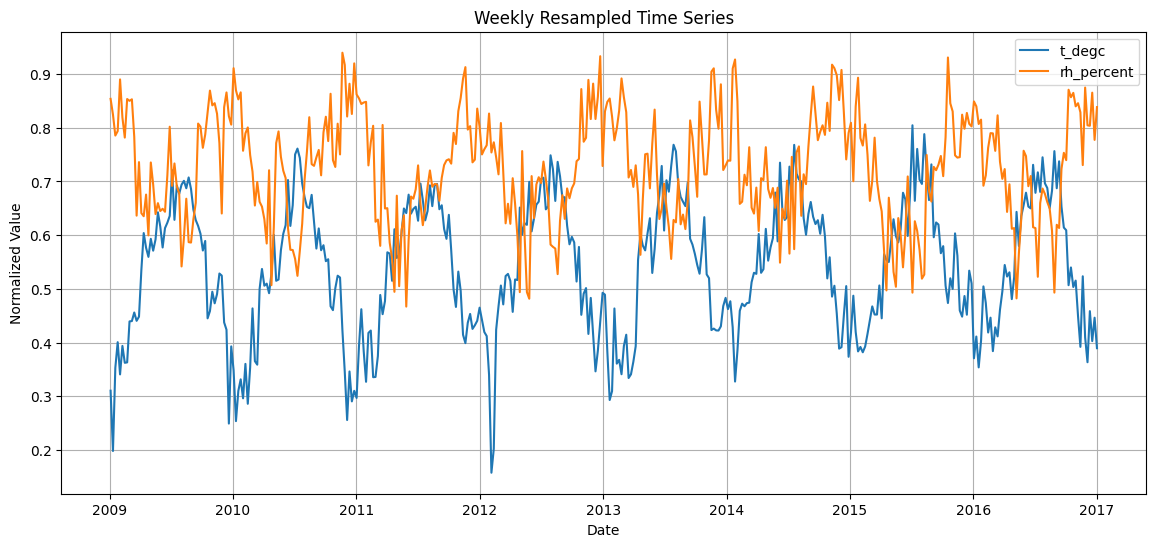

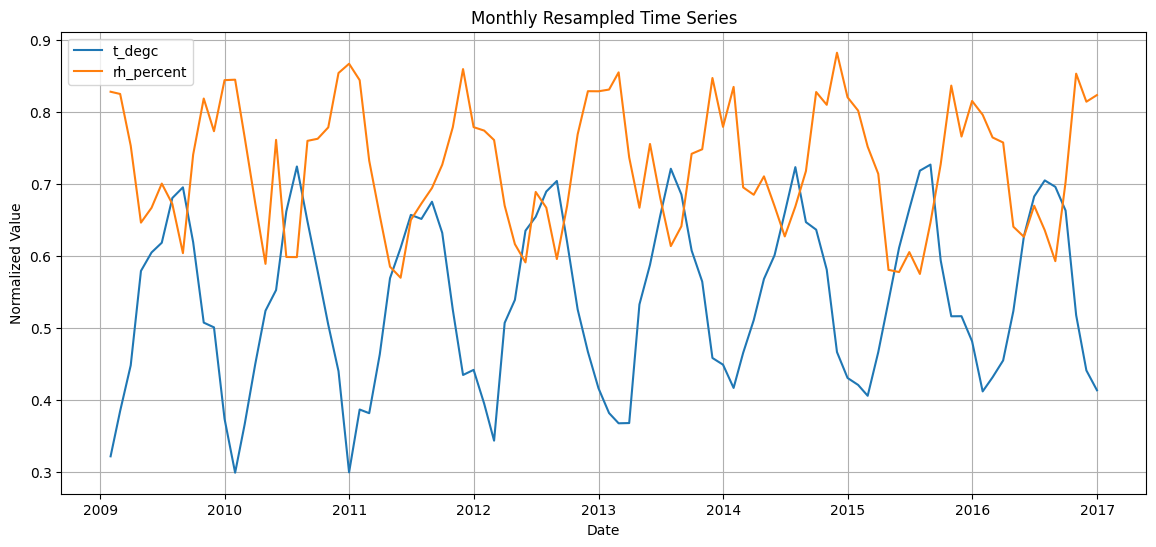

In [ ]:
import matplotlib.pyplot as plt

# Graph1: the original time series
plt.figure(figsize=(14,6))
plt.plot(target_variables)
plt.title('Original Time Series: Temperature and Humidity')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.grid()
plt.legend(target_variables.columns)
plt.show()

#Resampling to daily/weekly/monthly
target_daily = target_variables.resample('D').mean()
target_weekly = target_variables.resample('W').mean()
target_monthly = target_variables.resample('ME').mean()

# Graph2: The daily resampled
plt.figure(figsize=(14,6))
plt.plot(target_daily)
plt.title('Daily Resampled Time Series')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.grid()
plt.legend(target_variables.columns)
plt.show()

# Graph3: The weekly resampled
plt.figure(figsize=(14,6))
plt.plot(target_weekly)
plt.title('Weekly Resampled Time Series')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.grid()
plt.legend(target_variables.columns)
plt.show()

# Graph4: The monthly resampled
plt.figure(figsize=(14,6))
plt.plot(target_monthly)
plt.title('Monthly Resampled Time Series')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.grid()
plt.legend(target_variables.columns)
plt.show()

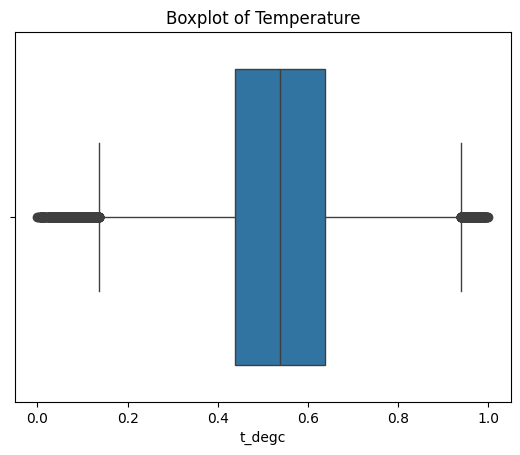

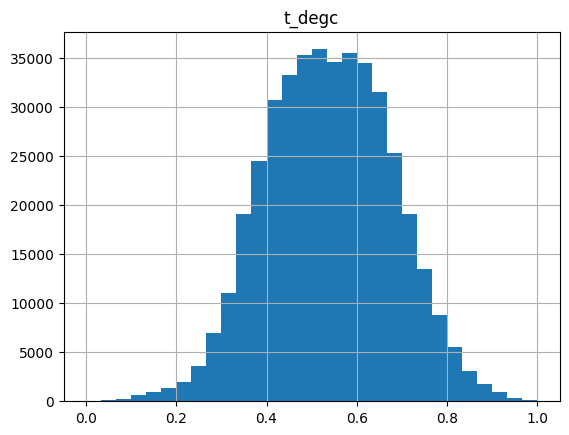

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Example for a variable like 'temperature'
sns.boxplot(x=df['t_degc'])
plt.title("Boxplot of Temperature")
plt.show()

# Check normalization
df[['t_degc']].hist(bins=30)
plt.show()

# Normalize if necessary
scaler = StandardScaler()
df['temperature_scaled'] = scaler.fit_transform(df[['t_degc']])

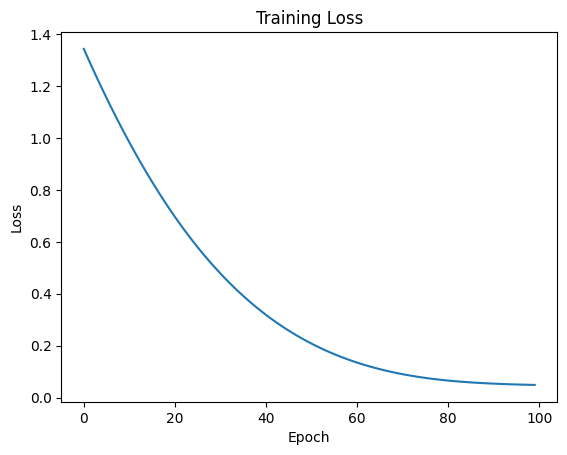

In [ ]:
import torch
import torch.nn as nn
import numpy as np

class MambaForecaster(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MambaForecaster, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

# Prepare data (replace with your actual data preparation logic)
# Assuming target_variables contains your time series data
# This is a simplified example: using temperature as input and humidity as target
# You will likely need a more sophisticated method to create sequences for Mamba
data = target_variables[['t_degc', 'rh_percent']].values
X = data[:-1, 0:1] # Use temperature as input feature (all rows except the last)
y = data[1:, 1:2] # Use humidity as target (all rows except the first)

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Simple train/test split (you might want to use a time series split)
split_ratio = 0.8
split_index = int(len(X_tensor) * split_ratio)

X_train = X_tensor[:split_index]
y_train = y_tensor[:split_index]
X_test = X_tensor[split_index:]
y_test = y_tensor[split_index:]


# Define model, loss, and optimizer
model = MambaForecaster(input_dim=X_train.shape[1], hidden_dim=64, output_dim=y_train.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Track loss
losses = []

# Dummy training loop (replace with real data)
for epoch in range(100):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot training loss
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)
    print(f"Test Loss: {test_loss.item()}")


Test Loss: 0.04866117611527443


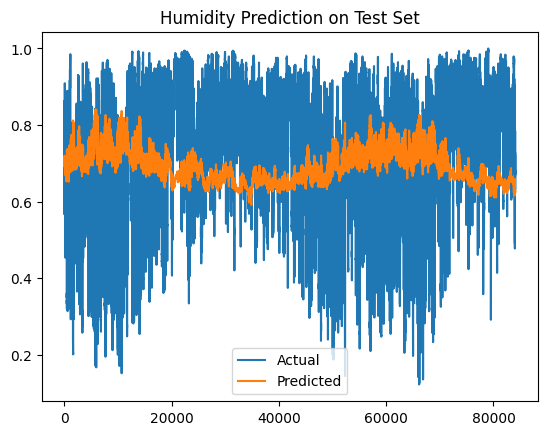

In [ ]:
plt.plot(y_test.numpy(), label="Actual")
plt.plot(y_pred.numpy(), label="Predicted")
plt.legend()
plt.title("Humidity Prediction on Test Set")
plt.show()


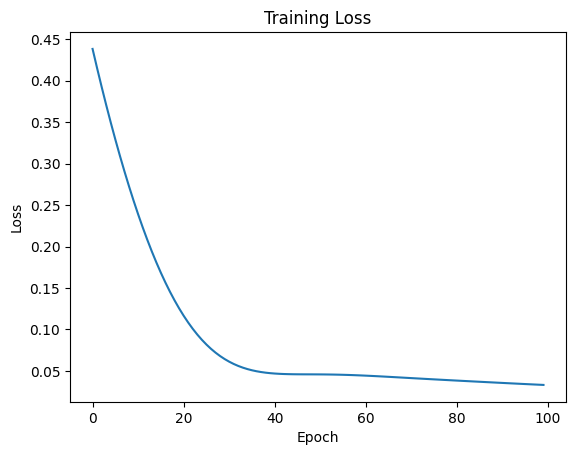

Mean Absolute Error (MAE): 0.1479
Mean Squared Error (MSE): 0.0315
Root Mean Squared Error (RMSE): 0.1775
R-squared (R2): 0.1083


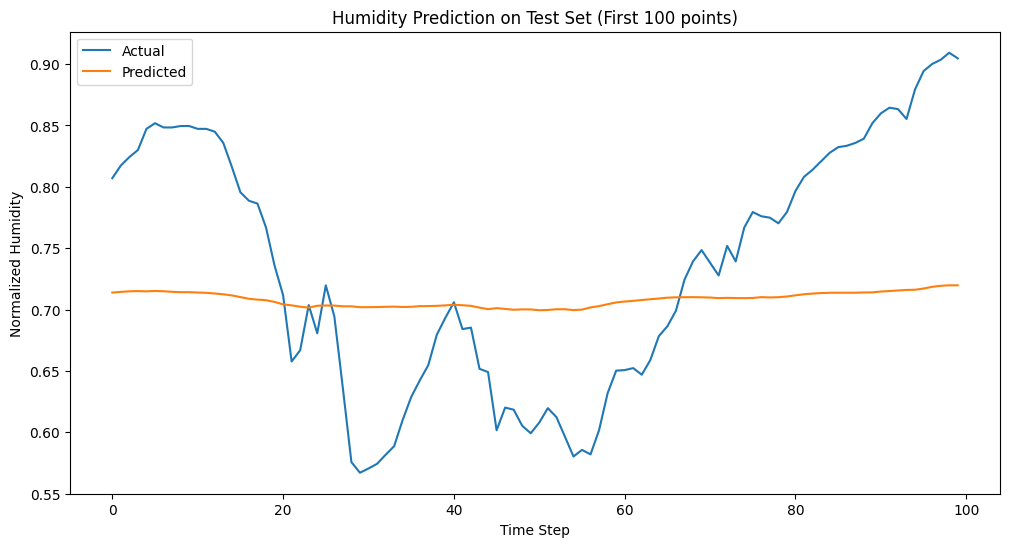

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare input/output data (replace this with your actual DataFrame)
data = target_variables[['t_degc', 'rh_percent']].values
X = data[:-1, 0:1]  # temperature
y = data[1:, 1:2]   # next humidity

# Convert to tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Train/test split
split_index = int(len(X_tensor) * 0.8)
X_train, y_train = X_tensor[:split_index], y_tensor[:split_index]
X_test, y_test = X_tensor[split_index:], y_tensor[split_index:]

# Define model
class MambaForecaster(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MambaForecaster, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model = MambaForecaster(input_dim=1, hidden_dim=64, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Early stopping setup
train_losses = []
patience = 10
min_delta = 1e-4
best_loss = float('inf')
patience_counter = 0

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Early stopping
    if loss.item() < best_loss - min_delta:
        best_loss = loss.item()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

# Plot training loss
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Evaluate on test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

# Convert to numpy
y_pred_np = y_pred.numpy()
y_test_np = y_test.numpy()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_np, y_pred_np)
mse = mean_squared_error(y_test_np, y_pred_np)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred_np)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_np[:100], label="Actual") # Plotting a subset for clarity
plt.plot(y_pred_np[:100], label="Predicted") # Plotting a subset for clarity
plt.title("Humidity Prediction on Test Set (First 100 points)")
plt.xlabel("Time Step")
plt.ylabel("Normalized Humidity")
plt.legend()
plt.show()

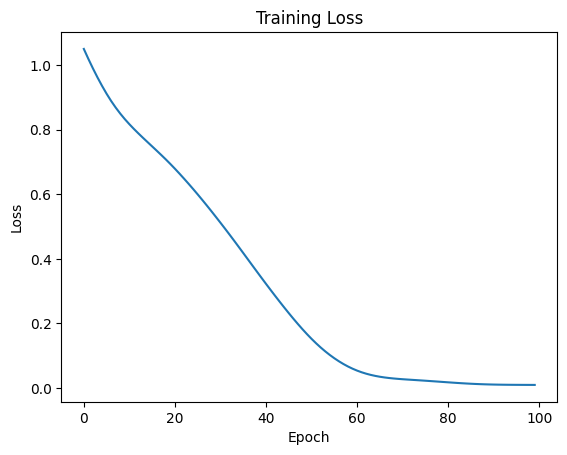

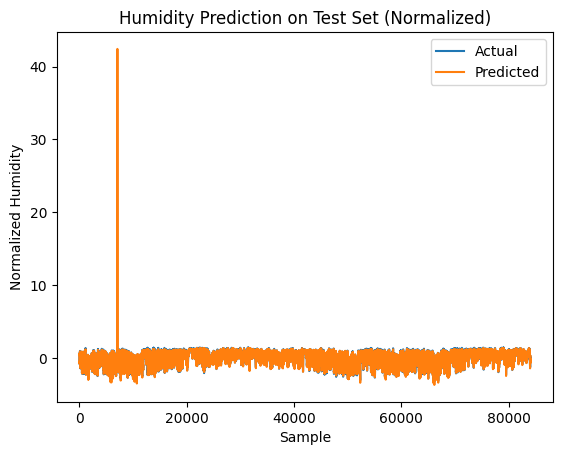

Mean Absolute Error (MAE): 0.0753
Mean Squared Error (MSE): 0.3964
Root Mean Squared Error (RMSE): 0.6296
R-squared (R2): 0.5989


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Remove extreme humidity values
filtered_df = target_variables[
    (target_variables['rh_percent'] > 5) & (target_variables['rh_percent'] < 100)
]

# ---------------------------
# 1. Select and normalize features
# ---------------------------
features = ['t_degc', 'wv_m/s', 'tdew_degc']  # add more if needed
target = 'rh_percent'

# Drop missing values
data_df = df[features + [target]].dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df)

X = scaled_data[:-1, :-1]   # All features except the target (next-step)
y = scaled_data[1:, -1:]    # Target variable shifted by one (for next prediction)

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Train-test split
split_index = int(len(X_tensor) * 0.8)
X_train, y_train = X_tensor[:split_index], y_tensor[:split_index]
X_test, y_test = X_tensor[split_index:], y_tensor[split_index:]

# ---------------------------
# 2. Build improved neural network
# ---------------------------
class MambaForecaster(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MambaForecaster, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model = MambaForecaster(input_dim=X.shape[1], hidden_dim=64, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ---------------------------
# 3. Train with early stopping
# ---------------------------
train_losses = []
best_loss = float('inf')
patience = 10
min_delta = 1e-4
patience_counter = 0

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if loss.item() < best_loss - min_delta:
        best_loss = loss.item()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

# Plot training loss
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# ---------------------------
# 4. Evaluate on test set
# ---------------------------
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

# Convert to numpy
y_pred_np = y_pred.numpy()
y_test_np = y_test.numpy()

# Plot predictions vs actual
plt.plot(y_test_np, label="Actual")
plt.plot(y_pred_np, label="Predicted")
plt.title("Humidity Prediction on Test Set (Normalized)")
plt.xlabel("Sample")
plt.ylabel("Normalized Humidity")
plt.legend()
plt.show()

# ---------------------------
# 5. Show metrics
# ---------------------------
mae = mean_absolute_error(y_test_np, y_pred_np)
mse = mean_squared_error(y_test_np, y_pred_np)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred_np)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------------
# Parameters
# -------------------------
SEQ_LEN = 10  # Number of time steps
FEATURES = ['t_degc', 'wv_m/s', 'tdew_degc']
TARGET = 'rh_percent'

# -------------------------
# Load and Clean Data
# -------------------------
# Use the original df with all columns
df = pd.read_csv('/content/drive/MyDrive/Datasets/max_planck_weather_ts.csv')

# Clean column names for consistency
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
    .str.replace('%', 'percent', regex=False)
)

# Convert 'date_time' to datetime format and set as index
df['date_time'] = pd.to_datetime(df['date_time'], format='%d.%m.%Y %H:%M:%S')
df.set_index('date_time', inplace=True)


df = df[(df[TARGET] > 5) & (df[TARGET] < 100)].dropna()

scaler = StandardScaler()
scaled = scaler.fit_transform(df[FEATURES + [TARGET]])

X_raw = scaled[:, :-1]  # features
y_raw = scaled[:, -1:]  # target

# -------------------------
# Create sequences
# -------------------------
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(seq_len, len(X)):
        X_seq.append(X[i-seq_len:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_raw, y_raw, SEQ_LEN)

# Convert to tensors
X_tensor = torch.FloatTensor(X_seq)
y_tensor = torch.FloatTensor(y_seq)

# Train/test split
split = int(0.8 * len(X_tensor))
X_train, y_train = X_tensor[:split], y_tensor[:split]
X_test, y_test = X_tensor[split:], y_tensor[split:]

# -------------------------
# Define LSTM Model
# -------------------------
class LSTMForecaster(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=1):
        super(LSTMForecaster, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Use last output only
        return out

model = LSTMForecaster(input_dim=len(FEATURES), hidden_dim=64)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# -------------------------
# Train Model
# -------------------------
epochs = 100
train_losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

# Plot training loss
plt.plot(train_losses)
plt.title("LSTM Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# -------------------------
# Evaluate Model
# -------------------------
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

# Convert to numpy
y_pred_np = y_pred.numpy()
y_test_np = y_test.numpy()

# Plot
plt.plot(y_test_np, label='Actual')
plt.plot(y_pred_np, label='Predicted')
plt.title("LSTM Humidity Forecast (Normalized)")
plt.xlabel("Sample")
plt.ylabel("Normalized Humidity")
plt.legend()
plt.show()

# -------------------------
# Metrics
# -------------------------
mae = mean_absolute_error(y_test_np, y_pred_np)
mse = mean_squared_error(y_test_np, y_pred_np)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred_np)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

In [ ]:
# check for any outliers
# check if the variables is normalized, if not you can prob just drop it.
# maybe after you build the model you can add the variavle you dropped to see if it improves it.


In [ ]:
# Create a Mamba forecaster class for the model
# create an optimizer and loss snippet
# Plot the loss first and then the test results

In [ ]:
# Histogram of temperature distribution
# use -20 to 40 degrees ceclius


In [ ]:
# THe klevin is usually more accurate instead of using the celsius becuase they base the celcius on th ekalvin UNLESS they actually have the celsius theromoeter.

In [ ]:
# PM talked about a cool function in python that you can use...
# multcollinearty: use this becuase you can check if any variables in your dataset correlate to each other
# SAVE THIS TO NOTION VERY COOL function


In [ ]:
# This dataset contains 14 different features such as air temperature, atmospheric pressure, and humidity. These were collected every 10 minutes, beginning in 2003. For efficiency, you will use only the data collected between 2009 and 2016.

# The table below shows the column names, their value formats, and their description.

# Index	Features	Format	Description
# 1	Date Time	01.01.2009 00:10:00	Date-time reference
# 2	p (mbar)	996.52	The pascal SI derived unit of pressure used to quantify internal pressure. Meteorological reports typically state atmospheric pressure in millibars.
# 3	T (degC)	-8.02	Temperature in Celsius
# 4	Tpot (K)	265.4	Temperature in Kelvin
# 5	Tdew (degC)	-8.9	Temperature in Celsius relative to humidity. Dew Point is a measure of the absolute amount of water in the air, the DP is the temperature at which the air cannot hold all the moisture in it and water condenses.
# 6	rh (%)	93.3	Relative Humidity is a measure of how saturated the air is with water vapor, the %RH determines the amount of water contained within collection objects.
# 7	VPmax (mbar)	3.33	Saturation vapor pressure
# 8	VPact (mbar)	3.11	Vapor pressure
# 9	VPdef (mbar)	0.22	Vapor pressure deficit
# 10	sh (g/kg)	1.94	Specific humidity
# 11	H2OC (mmol/mol)	3.12	Water vapor concentration
# 12	rho (g/m ** 3)	1307.75	Airtight
# 13	wv (m/s)	1.03	Wind speed
# 14	max. wv (m/s)	1.75	Maximum wind speed
# 15	wd (deg)	152.3	Wind direction in degrees